### Dummy data for the generative tensor network state project

Input: vector of floats.

Output: weighted graph.

Note: I'm seriously considering doing everything in pytorch, not pytorchGeometric. So we'll see if much of this changes.

In [5]:

import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

import pickle

import datetime

def get_date():
    return str( datetime.date.today() )


import torch
from torch_geometric.data import Data

'''
Note:
- Might end up being better to do regular pyTorch.

Questions for Matt:
- How are "open" edges on TNS graph represented?
'''


'\nNote:\n- Might end up being better to do regular pyTorch. And \n\nQuestions for Matt:\n- How are "open" edges on TNS graph represented?\n'

[3.29329188 3.18357341 3.49137393 3.82624311 4.10026067 4.5889682
 3.87085155 2.80143157 3.19931378 2.10242158 3.08306831 0.34347604
 2.58519625 3.02987403 2.91829136 2.99622259 3.74821359 4.00063105
 3.45107117 3.42080947 2.73006174 4.28234357 3.14530875 2.59921864
 3.30963426 2.25434694 2.95099517 2.14436732 2.29984773 2.17208142]


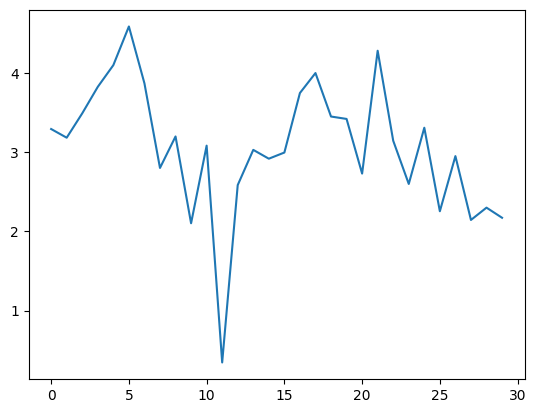

In [6]:
# Random vector

# Parameters
num_points = 30  # Number of data points
frequency = .2  # Frequency of the sine wave
amplitude = 1  # Amplitude of the sine wave
normalized_offset = 3
noise_std = 0.6 * amplitude  # Standard deviation of the random noise

# Generate x-axis values
x = np.linspace(0, 10, num_points)

# Generate sine wave
sine_wave = amplitude * (np.sin(2 * np.pi * frequency * x) + normalized_offset)

# Add random noise
noise = np.random.normal(0, noise_std, size=num_points)

# Combine sine wave and noise
data = sine_wave + noise

# Print the data vector
print(data)

plt.plot(data)



In [13]:


inp_vectors = []
pyG_data = []

n_data = 1000

for i in range(n_data):
    
    # *** Vector input ***
    # Parameters
    num_points = 30  # Number of data points
    frequency = .2  # Frequency of the sine wave
    amplitude = 1  # Amplitude of the sine wave
    normalized_offset = 3
    noise_std = 0.6 * amplitude  # Standard deviation of the random noise
    
    # Generate x-axis values
    x = np.linspace(0, 10, num_points)
    
    # Generate sine wave
    sine_wave = amplitude * (np.sin(2 * np.pi * frequency * x) + normalized_offset)
    
    # Add random noise
    noise = np.random.normal(0, noise_std, size=num_points)
    
    # Combine sine wave and noise
    vec = sine_wave + noise

    
    # *** Graph output ***
    # Random graphs (unweighted)
    n = 2*num_points # Graph has twice as many nodes as num points
    deg = 3
    Gu = nx.random_regular_graph(deg,n)
    # print(Gu)
    
    # Create a new *weighted* graph
    Gw = nx.Graph()
        
    # Copy nodes from the unweighted graph
    for eid,edge in enumerate(Gu.edges):
        n1 = edge[0]
        n2 = edge[1]
        weight = int( (vec[0]+vec[1])/2 +np.random.normal(0, noise_std) ) # Some semblance of correlation/connection with input vector
        Gw.add_edge( n1,n2 ,weight=weight )
    # print(Gw)
    
    # Get the adjacency matrix (sparse format)
    A = nx.adjacency_matrix(Gw, weight='weight')  # Specify 'weight' key for weights
    # A = nx.adjacency_matrix(Gu)  # Specify 'weight' key for weights
    
    # Convert to dense NumPy array (optional)
    A_dense = A.toarray()
    
    # Print the adjacency matrix
    # print(A_dense)
    # plt.spy(A_dense)
    
    # Assuming you have your weighted adjacency matrix (A) and node labels (y, optional)
    edge_index = A_dense.nonzero()
    edge_index = torch.tensor(edge_index, dtype=torch.long)
    edge_attr = A_dense[edge_index[0], edge_index[1]]
    edge_attr = torch.tensor(edge_attr, dtype=torch.float)
    
    data = Data(edge_index=edge_index, edge_attr=edge_attr)#, y=y)  # Include y if you have labels

    pyG_data.append( (vec,data) )


print(pyG_data)

[(array([2.78834771, 2.47518644, 3.05049046, 5.07370469, 4.51127376,
       3.36039477, 2.72491731, 2.57187911, 2.90116477, 2.65271197,
       2.27736108, 2.04099978, 3.08917082, 3.18964144, 2.9918133 ,
       2.13936666, 4.08960023, 4.18643817, 3.57535914, 4.00202729,
       4.03604508, 2.46043582, 3.61971603, 3.53372478, 3.56528143,
       2.24001185, 1.34993843, 1.99276572, 3.25249137, 3.09508694]), Data(edge_index=[2, 180], edge_attr=[180])), (array([3.33859634, 2.93007176, 3.57042076, 4.4638321 , 4.39440105,
       3.85266186, 3.33609848, 2.1529463 , 2.29201711, 2.04430062,
       2.77181472, 2.02391789, 2.0433044 , 2.80480545, 2.48270211,
       2.16469161, 4.29304178, 4.10196564, 4.64804182, 3.50499088,
       2.45805329, 3.12525884, 3.96496996, 2.31917952, 1.92842951,
       2.41563562, 2.95361891, 1.75165348, 2.46950727, 4.07999936]), Data(edge_index=[2, 180], edge_attr=[180])), (array([3.51182948, 3.18897326, 3.91523927, 4.5483215 , 3.83835412,
       3.64390084, 3.36371047, 

In [14]:
# Pickle it up
datestr = get_date()
fname = f"dummy_data_{datestr}.pkl"
print(fname)
with open(fname,'wb') as f:
    pickle.dump(pyG_data, f)


dummy_data_2024-03-20.pkl


In [10]:
# Read from the pickle
fname = "dummy_data_2024-03-20.pkl"
with open(fname, 'rb') as f:
    loaded_data = pickle.load(f)

### Attempt quick-and-dirty model that outputs a graph